Monitoring Air Quality in the Great Smoky Mountains with a Network of Low-cost Sensors
----------------------------------------

**Al Fischer & CHEM 191**  
October, 09 2019-*In Progress*

In [2]:
temp <- list.files(path = "./pre-deployment-indoor-wcu", pattern="*.TXT", full.names=TRUE)
dataFiles <- lapply(temp, read.delim, header = F, col.names = c("ID", "Date/Time", "T (*C)", "RH (%)", "Pressure (hPa)", "VOC (au)", "PM_2.5 (ug/m3)"), check.names = F)
head(dataFiles[[1]])

ID,Date/Time,T (*C),RH (%),Pressure (hPa),VOC (au),PM_2.5 (ug/m3)
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EBAM,2019-10-11 12:32:28,22.81,51.20,945.80,0.00,1
EBAM,2019-10-11 12:42:56,23.41,45.10,945.80,25.36,1
EBAM,2019-10-11 12:53:24,24.27,41.23,945.78,39.25,2
EBAM,2019-10-11 13:03:52,25.21,38.65,945.72,44.01,1
EBAM,2019-10-11 13:14:20,26.16,36.67,945.64,46.13,1
EBAM,2019-10-11 13:24:48,27.14,34.72,945.54,46.80,1


In [3]:
require(zoo)

smoothPM <- function(df) {
    df$`PM_2.5_smoothed (ug/m3)` = rollmean(df[, 7], k = 5, na.pad = TRUE, align = "center")
    return(df)
}
dataFiles <- lapply(dataFiles, smoothPM)

normalizeVOC <- function(df) {
    df$`VOC (au)`[1:5] <- NA
    df$`VOC (normalized)` <- (df$`VOC (au)` - min(na.omit(df$`VOC (au)`)))
    df$`VOC (normalized)` <- df$`VOC (normalized)` / max(na.omit(df$`VOC (normalized)`))
    return(df)
}
dataFiles <- lapply(dataFiles, normalizeVOC)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [4]:
require(dplyr)
options(warn=-1)
dataset = bind_rows(dataFiles)
options(warn=0)
dataset$`Date/Time` <- as.POSIXct(dataset$`Date/Time`)
head(dataset)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



ID,Date/Time,T (*C),RH (%),Pressure (hPa),VOC (au),PM_2.5 (ug/m3),PM_2.5_smoothed (ug/m3),VOC (normalized)
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EBAM,2019-10-11 12:32:28,22.81,51.20,945.80,NA,1,NA,NA
EBAM,2019-10-11 12:42:56,23.41,45.10,945.80,NA,1,NA,NA
EBAM,2019-10-11 12:53:24,24.27,41.23,945.78,NA,2,1.2,NA
EBAM,2019-10-11 13:03:52,25.21,38.65,945.72,NA,1,1.2,NA
EBAM,2019-10-11 13:14:20,26.16,36.67,945.64,NA,1,1.4,NA
EBAM,2019-10-11 13:24:48,27.14,34.72,945.54,46.8,1,1.2,0.1083953


Loading required package: ggplot2


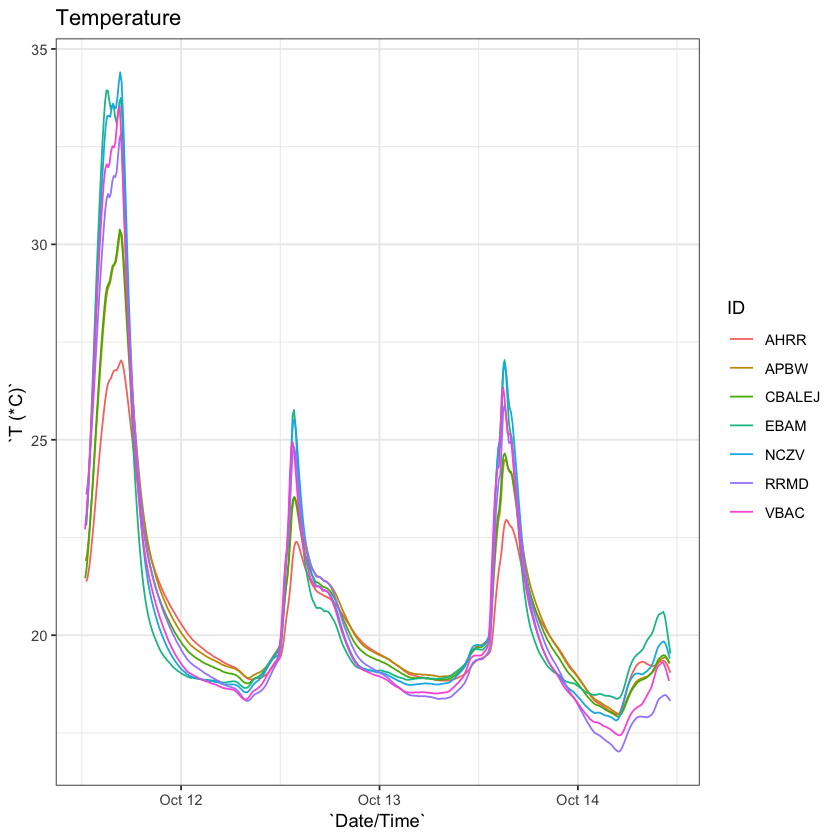

In [5]:
require(ggplot2)
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `T (*C)`)) +
    theme_bw() + labs(title = "Temperature")

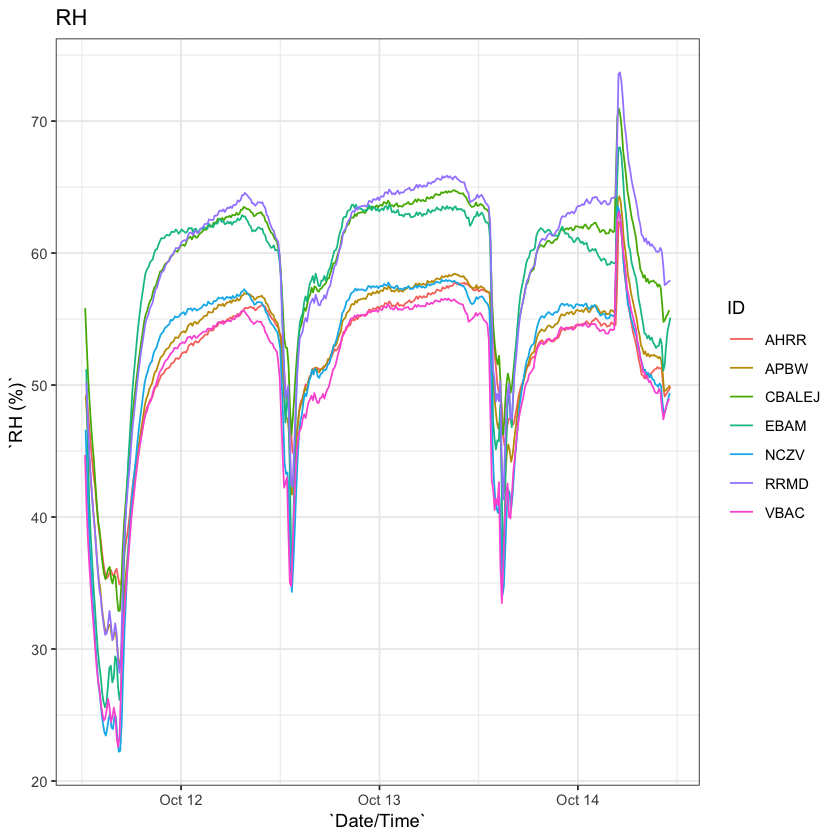

In [6]:
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `RH (%)`)) +
    theme_bw() + labs(title = "RH")

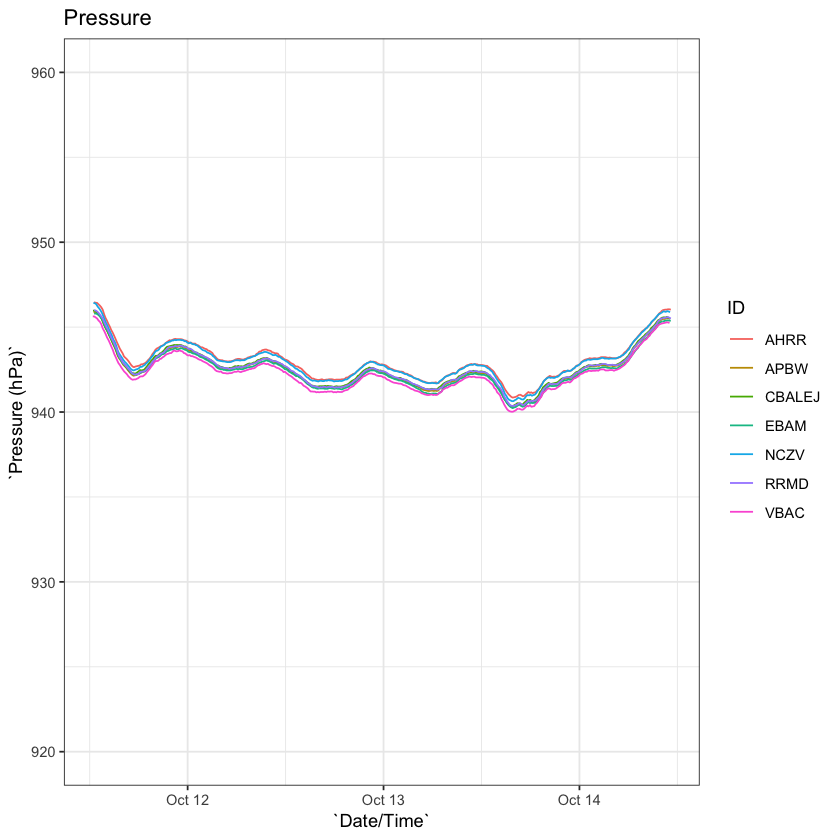

In [7]:
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `Pressure (hPa)`)) + ylim(920, 960) +
    theme_bw() + labs(title = "Pressure")

Warning message:
“Removed 35 rows containing missing values (geom_path).”

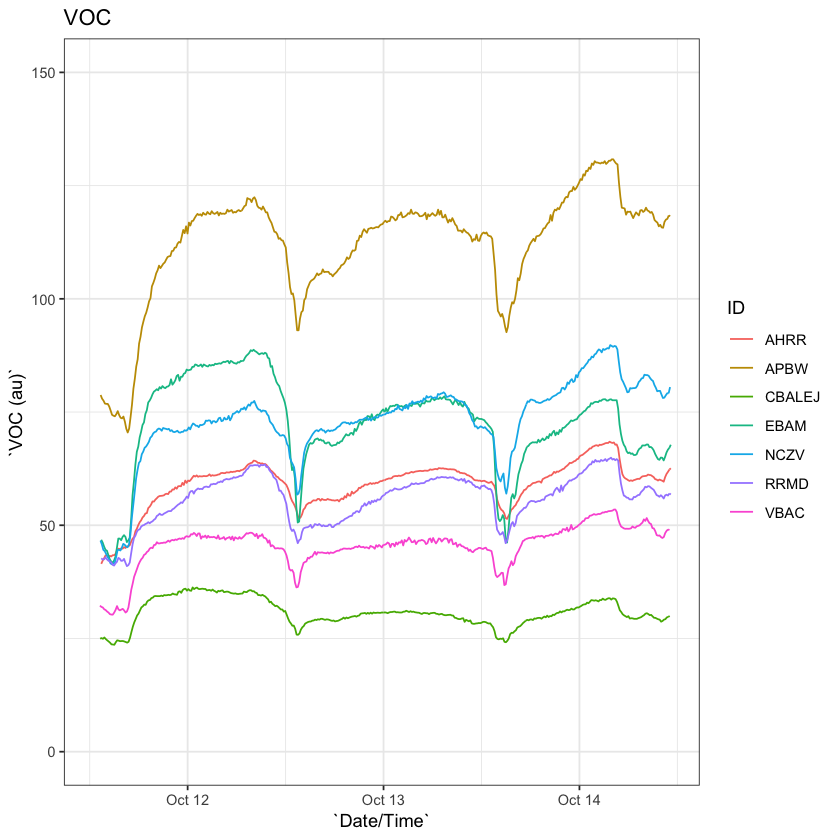

In [8]:
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `VOC (au)`)) + ylim(0, 150) +
    theme_bw() + labs(title = "VOC")

Warning message:
“Removed 35 rows containing missing values (geom_path).”

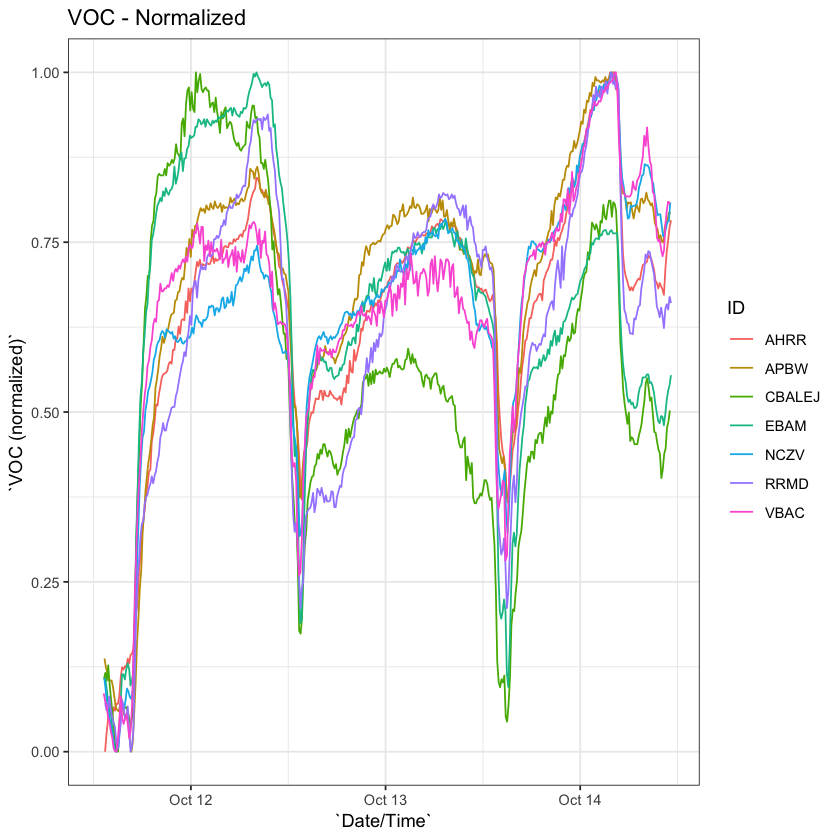

In [9]:
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `VOC (normalized)`)) + ylim(0, 1) +
    theme_bw() + labs(title = "VOC - Normalized")

Warning message:
“Removed 28 rows containing missing values (geom_path).”

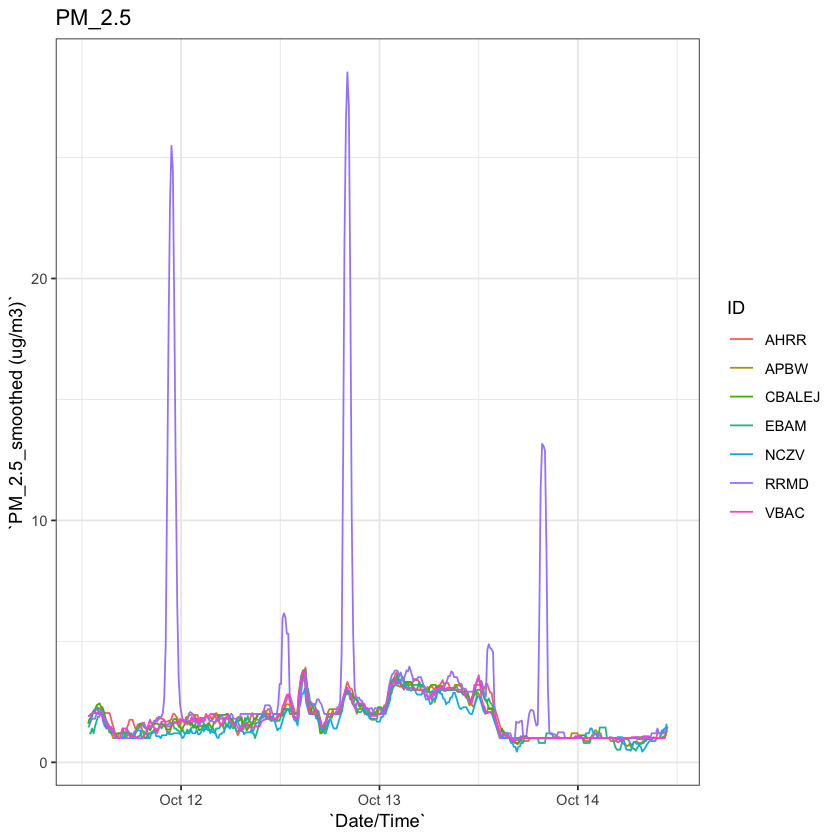

In [10]:
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `PM_2.5_smoothed (ug/m3)`)) + 
    theme_bw() + labs(title = "PM_2.5")

# Outdoor Test

In [31]:
temp <- list.files(path = "./pre-deployment-outdoor-wcu", pattern="*.TXT", full.names=TRUE)
dataFiles <- lapply(temp, read.delim, header = F, col.names = c("ID", "Date/Time", "T (*C)", "RH (%)", "Pressure (hPa)", "VOC (au)", "PM_2.5 (ug/m3)"), check.names = F)
dataFiles <- lapply(dataFiles, smoothPM)
dataFiles <- lapply(dataFiles, normalizeVOC)
options(warn=-1)
dataset = bind_rows(dataFiles)
options(warn=0)
dataset$`Date/Time` <- as.POSIXct(dataset$`Date/Time`)
head(dataFiles[[1]])

ID,Date/Time,T (*C),RH (%),Pressure (hPa),VOC (au),PM_2.5 (ug/m3),PM_2.5_smoothed (ug/m3),VOC (normalized)
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFAF,2019-10-14 11:36:14,20.31,57.38,945.63,NA,18.2,NA,NA
AFAF,2019-10-14 11:36:48,20.32,55.18,945.63,NA,12.6,NA,NA
AFAF,2019-10-14 11:37:22,20.32,54.44,945.59,NA,10.0,11.64,NA
AFAF,2019-10-14 11:37:56,20.32,54.44,945.61,NA,10.0,9.60,NA
AFAF,2019-10-14 11:38:30,20.35,54.26,945.59,NA,7.4,8.12,NA
AFAF,2019-10-14 11:39:04,20.40,54.54,945.57,20.07,8.0,7.84,0


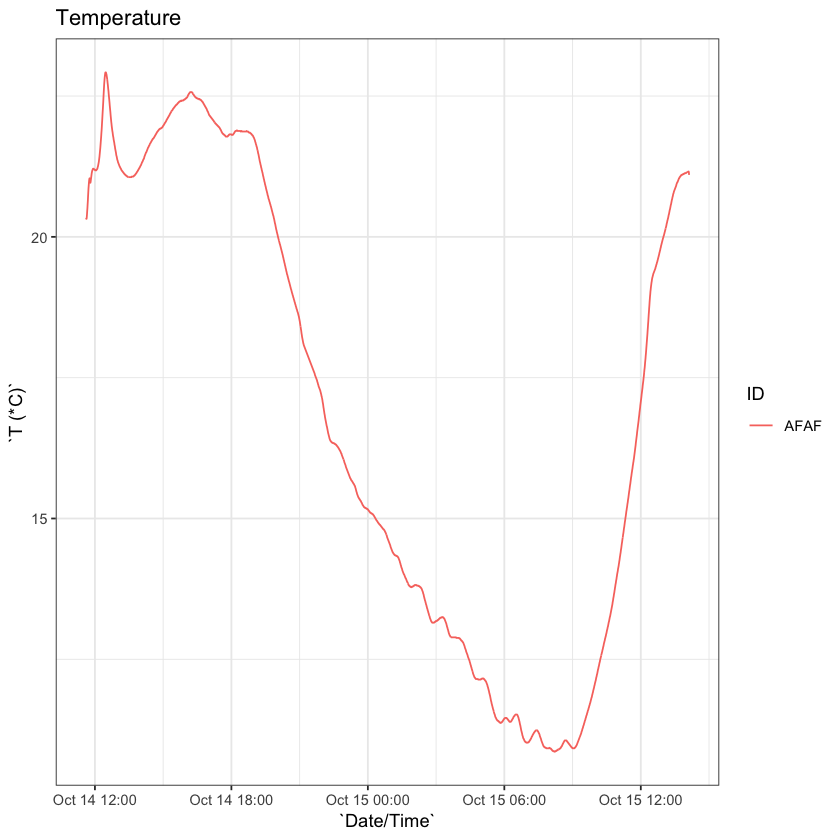

In [32]:
require(ggplot2)
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `T (*C)`)) +
    theme_bw() + labs(title = "Temperature")

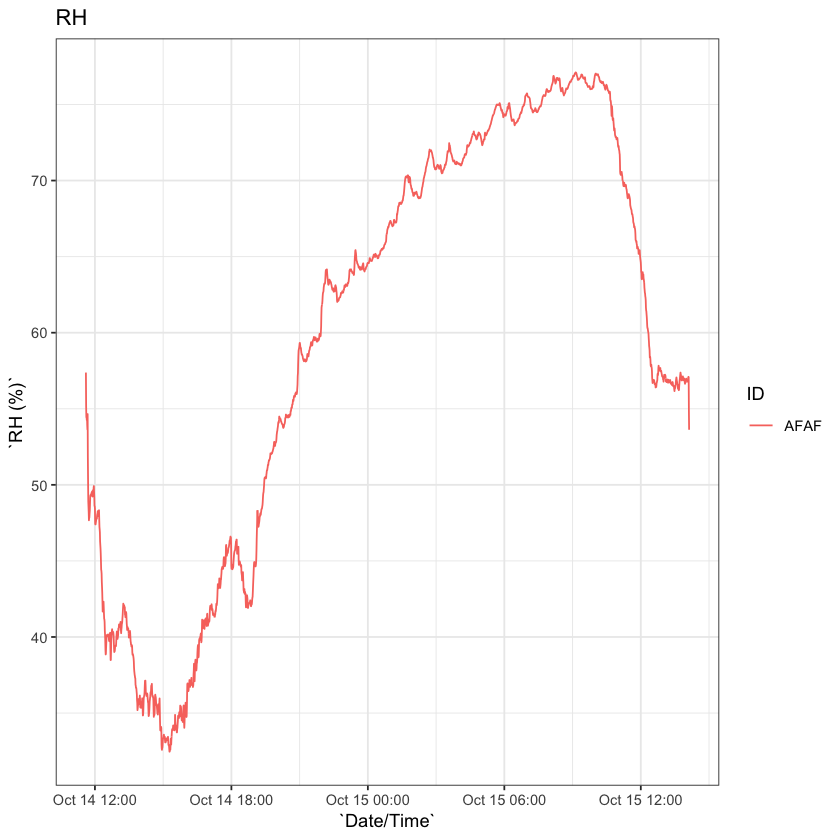

In [33]:
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `RH (%)`)) +
    theme_bw() + labs(title = "RH")

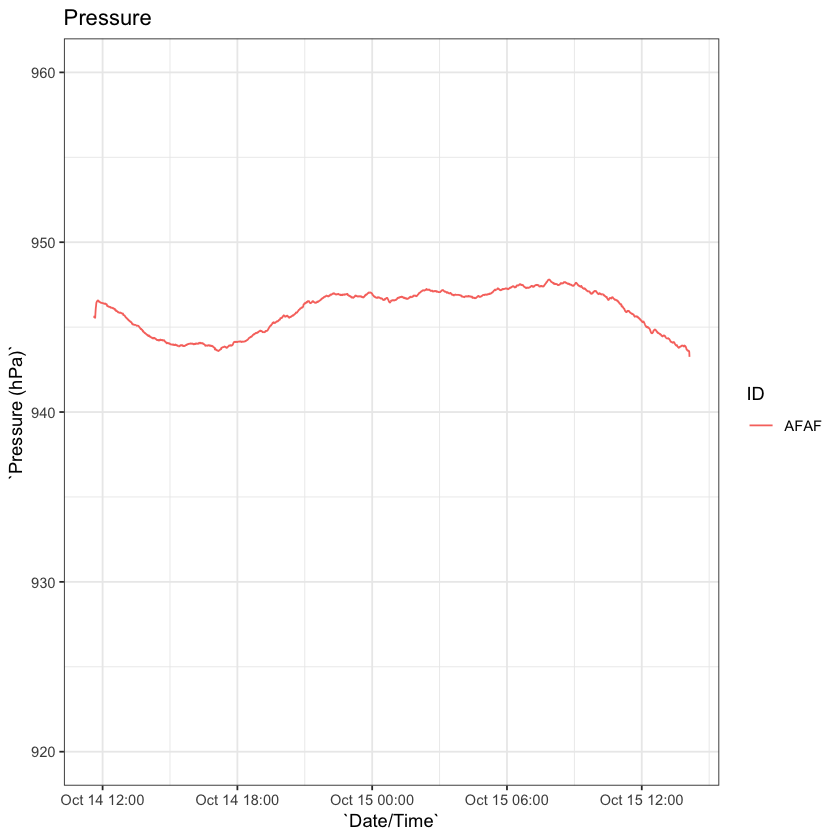

In [34]:
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `Pressure (hPa)`)) + ylim(920, 960) +
    theme_bw() + labs(title = "Pressure")

Warning message:
“Removed 5 rows containing missing values (geom_path).”

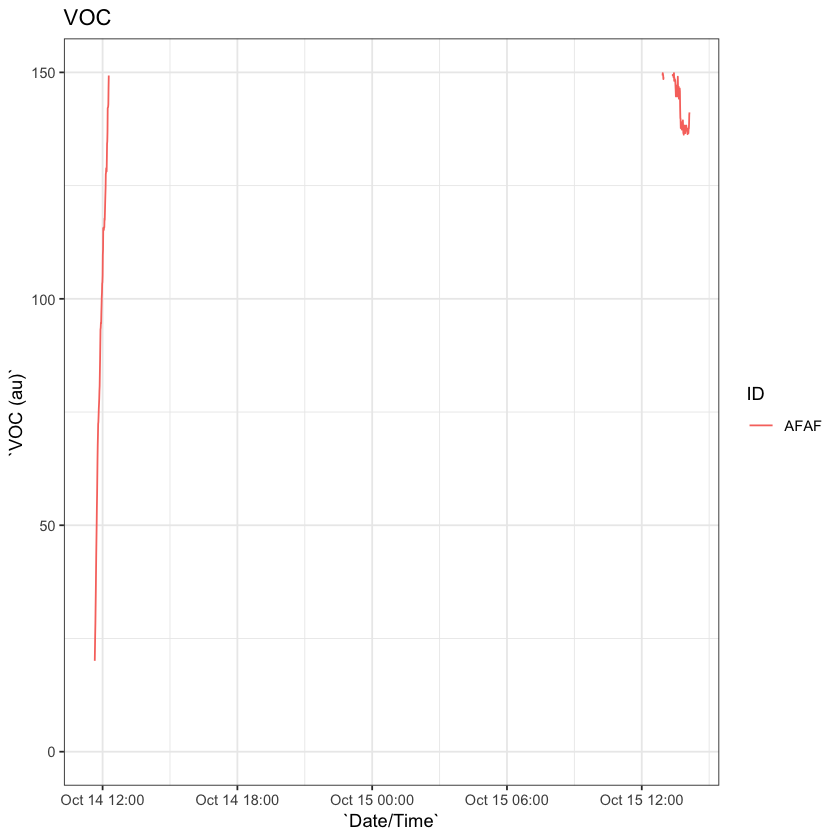

In [35]:
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `VOC (au)`)) + ylim(0, 150) +
    theme_bw() + labs(title = "VOC")

Warning message:
“Removed 5 rows containing missing values (geom_path).”

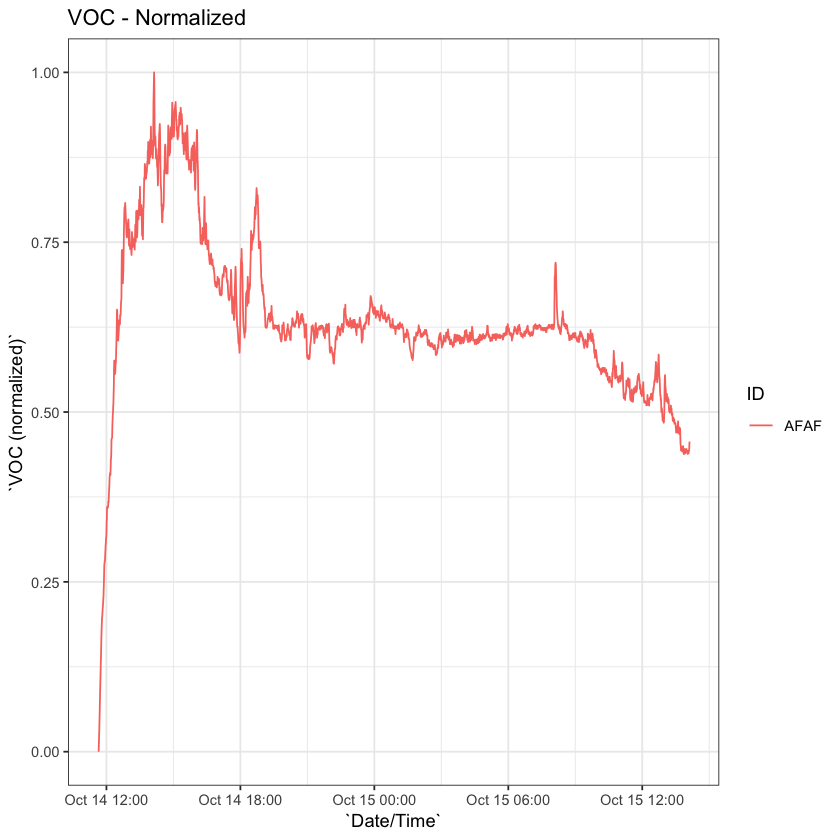

In [36]:
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `VOC (normalized)`)) + ylim(0, 1) +
    theme_bw() + labs(title = "VOC - Normalized")

Warning message:
“Removed 4 rows containing missing values (geom_path).”

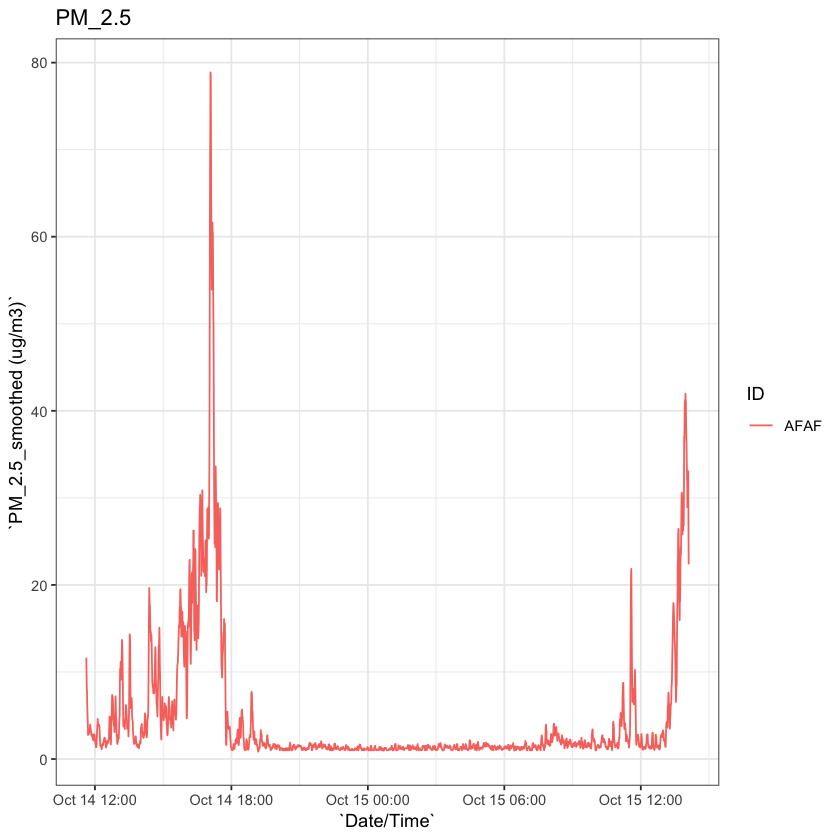

In [37]:
ggplot(data = dataset, aes(x = `Date/Time`, color = `ID`)) +
    geom_line(aes(y = `PM_2.5_smoothed (ug/m3)`)) + 
    theme_bw() + labs(title = "PM_2.5")